<a href="https://colab.research.google.com/github/Kushal-H-Choudhary/python/blob/main/startup_funding_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Indian startup funding Analysis - Exploratory Data Analysis

Loading and First Look

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv ')

Basic dataset information

In [ ]:
df.shape

(102, 8)

In [ ]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [ ]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


Data Quality Assessment

check data types and missing values

In [ ]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [ ]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


check for duplicates

In [ ]:
df.duplicated().sum()

np.int64(0)

Basic statistrics

In [ ]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


data preprocessimg

clean column names

In [ ]:
df.columns = df.columns.str.strip()

Convert Entry column to datetime

In [ ]:
df['Entry_Date'] = pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [ ]:
 df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


create valuation growth metric

In [ ]:
df['Valuation_Growth'] = df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


exatract primary city(befor'//)

In [ ]:
df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


count number of investors

In [ ]:
df['Investor_Count'] = df['Select Investors'].str.count(',') + 1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


Univariate Analysis

valuation distribution analysis

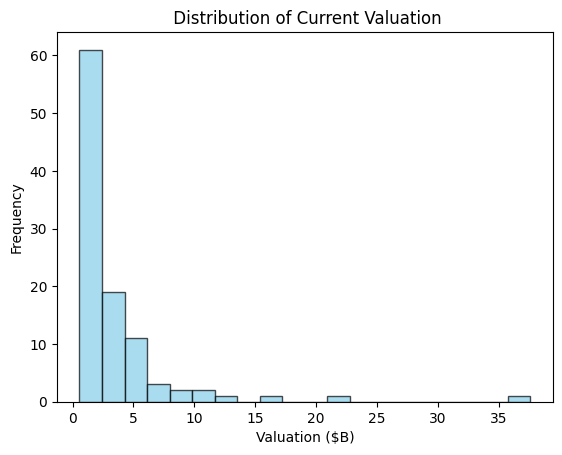

In [ ]:
plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='skyblue',edgecolor='black')
plt.title(' Distribution of Current Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

sector distribution

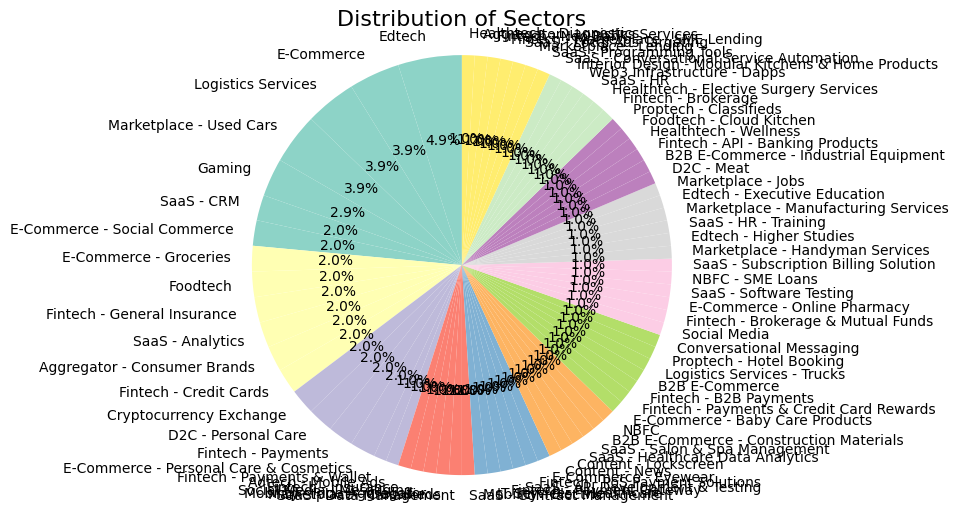

In [ ]:
plt.figure(figsize=(10,6))
sector_counts = df['Sector'].value_counts()
colors = plt.cm.Set3(np.linspace(0,1,len(sector_counts)))
plt.pie(sector_counts,labels=sector_counts.index, colors=colors,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sectors',fontsize=16)
plt.axis('equal')
plt.show()

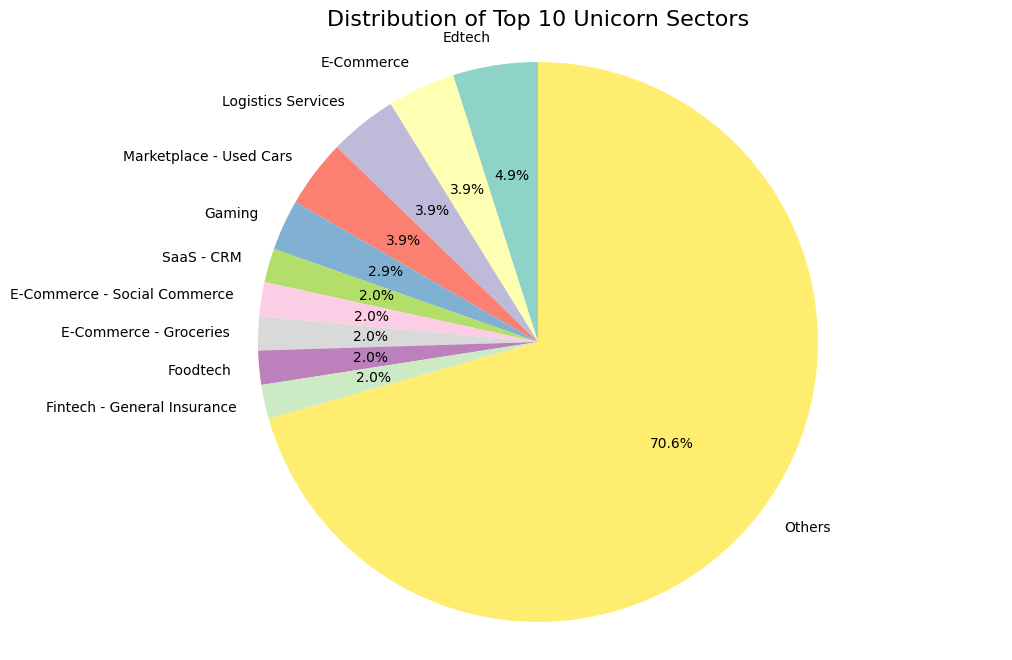

In [ ]:
def display_top_k_sectors(df,k):
  sector_counts = df['Sector'].value_counts()
  if k < len(sector_counts):
    top_k_sectors = sector_counts.head(k)
    other_sectors_counts = sector_counts.iloc[k:].sum()
    top_k_sectors['Others'] = other_sectors_counts
  else:
    top_k_sectors = sector_counts

  plt.figure(figsize=(12,8))
  colors = plt.cm.Set3(np.linspace(0,1,len(top_k_sectors)))
  plt.pie(top_k_sectors,labels=top_k_sectors.index,colors=colors,autopct='%1.1f%%',startangle=90)
  plt.title(f'Distribution of Top {k} Unicorn Sectors',fontsize=16)
  plt.axis('equal')
  plt.show()

display_top_k_sectors(df, 10)

top sectors bar chart

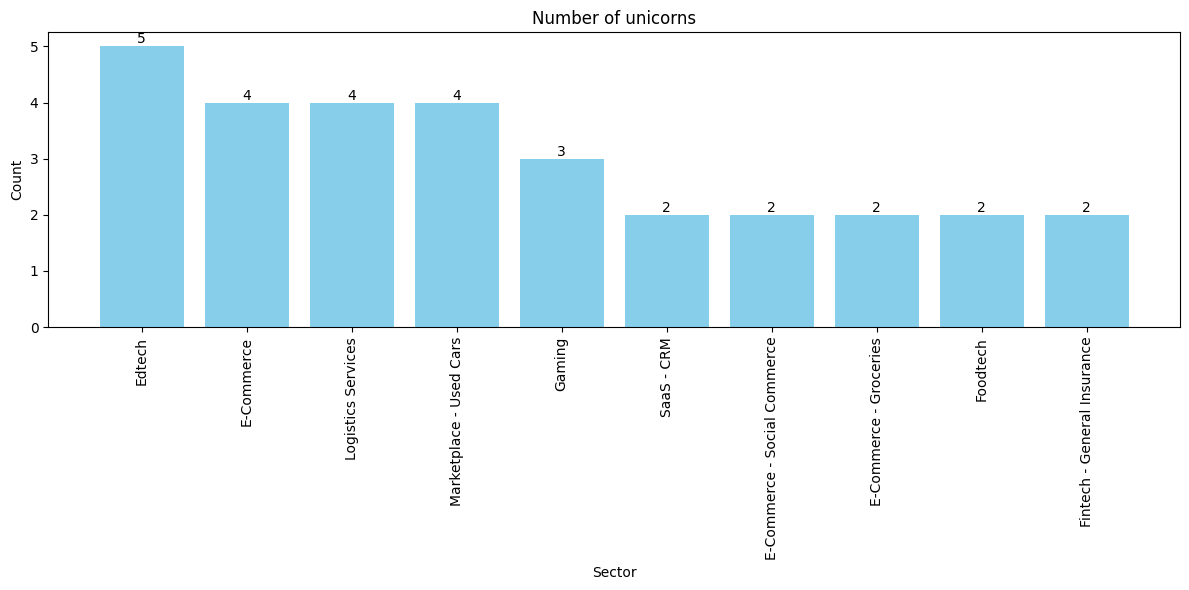

In [ ]:
plt.figure(figsize=(12,6))
top_k_sectors = sector_counts.head(10)
bars = plt.bar(top_k_sectors.index,top_k_sectors.values,color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Number of unicorns')
plt.xticks(range(len(top_k_sectors.index)),top_k_sectors.index,rotation=90)
for bar, value in zip(bars,top_k_sectors.values):
  plt.text(bar.get_x() + bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom')
plt.tight_layout()
plt.show()

city_wise distribution

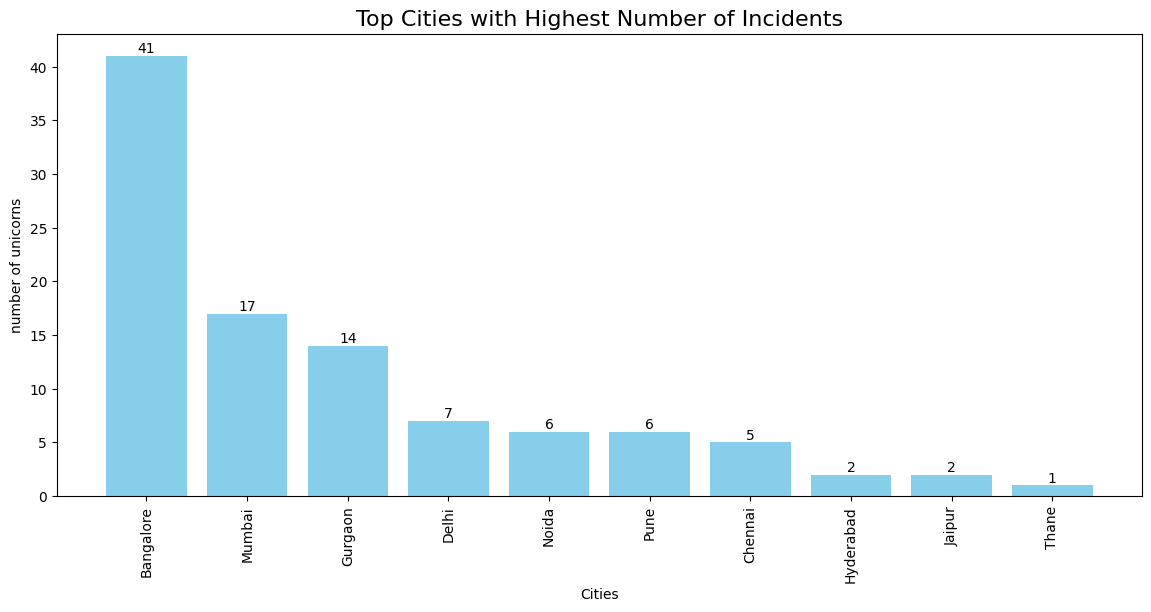

In [ ]:
plt.figure(figsize=(14,6))
city_counts = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_counts.index,city_counts.values,color='skyblue')
plt.title('Top Cities with Highest Number of Incidents',fontsize=16)
plt.xlabel('Cities')
plt.ylabel('number of unicorns')
plt.xticks(rotation=90)
for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x() + bar.get_width()/2,bar.get_height(),str(value),ha='center',va='bottom')

In [ ]:
city_summary = df.groupby('Primary_City').agg({'Valuation ($B)':['count','sum','mean'],'Entry_Year':['min','max']}).round(2)
city_summary.columns = ['Count','Total Valuation','Average Valuation','Start Year','End Year']
city_summary.head(10)

,Count,Total Valuation,Average Valuation,Start Year,End Year
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total Valuation'].plot(kind='hist', bins=20, title='Total Valuation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Average Valuation'].plot(kind='hist', bins=20, title='Average Valuation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Start Year'].plot(kind='hist', bins=20, title='Start Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Count', y='Total Valuation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Total Valuation', y='Average Valuation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Average Valuation', y='Start Year', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['End Year']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('End Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('End Year')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['End Year']
  ys = series['Total Valuation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('End Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('End Year')
_ = plt.ylabel('Total Valuation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['End Year']
  ys = series['Average Valuation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('End Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('End Year')
_ = plt.ylabel('Average Valuation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['End Year']
  ys = series['Start Year']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('End Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('End Year')
_ = plt.ylabel('Start Year')

from matplotlib import pyplot as plt
_df_11['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Total Valuation'].plot(kind='line', figsize=(8, 4), title='Total Valuation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Average Valuation'].plot(kind='line', figsize=(8, 4), title='Average Valuation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Start Year'].plot(kind='line', figsize=(8, 4), title='Start Year')
plt.gca().spines[['top', 'right']].set_visible(False)

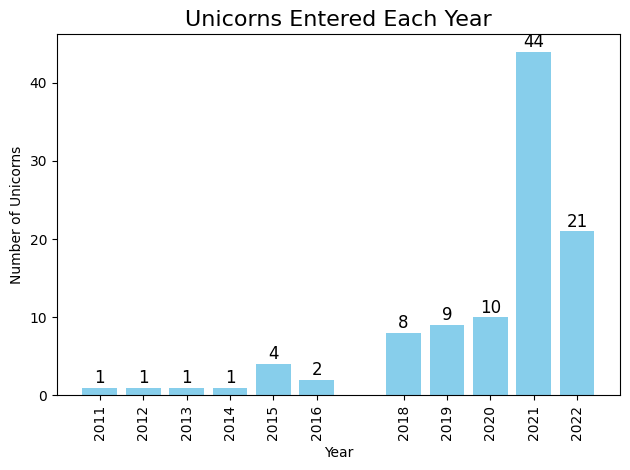

In [ ]:
yearly_entries = df['Entry_Year'].value_counts().sort_index()
bars = plt.bar(yearly_entries.index,yearly_entries.values,color='skyblue')
plt.title('Unicorns Entered Each Year',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=90)

for bar, value in zip(bars, yearly_entries.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(value), ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

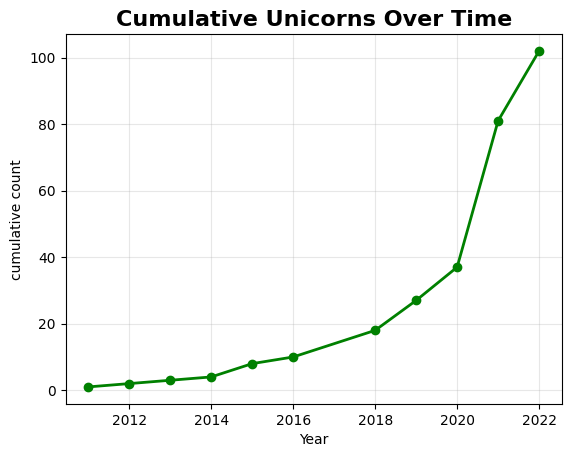

In [ ]:
cumulative = yearly_entries.cumsum()
plt.plot(cumulative.index, cumulative.values, marker='o', linewidth=2, color='green')
plt.title('Cumulative Unicorns Over Time',fontweight='bold',fontsize=16)
plt.xlabel('Year')
plt.ylabel('cumulative count')
plt.grid(True, alpha=0.3)
plt.show()


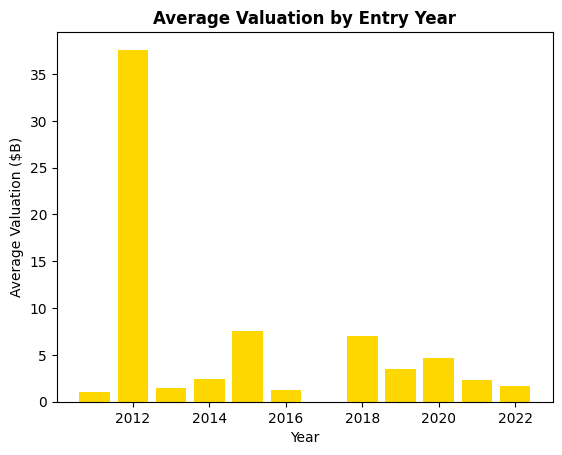

In [ ]:
avg_val_by_year = df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='gold')
plt.title('Average Valuation by Entry Year', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average Valuation ($B)')
plt.show()

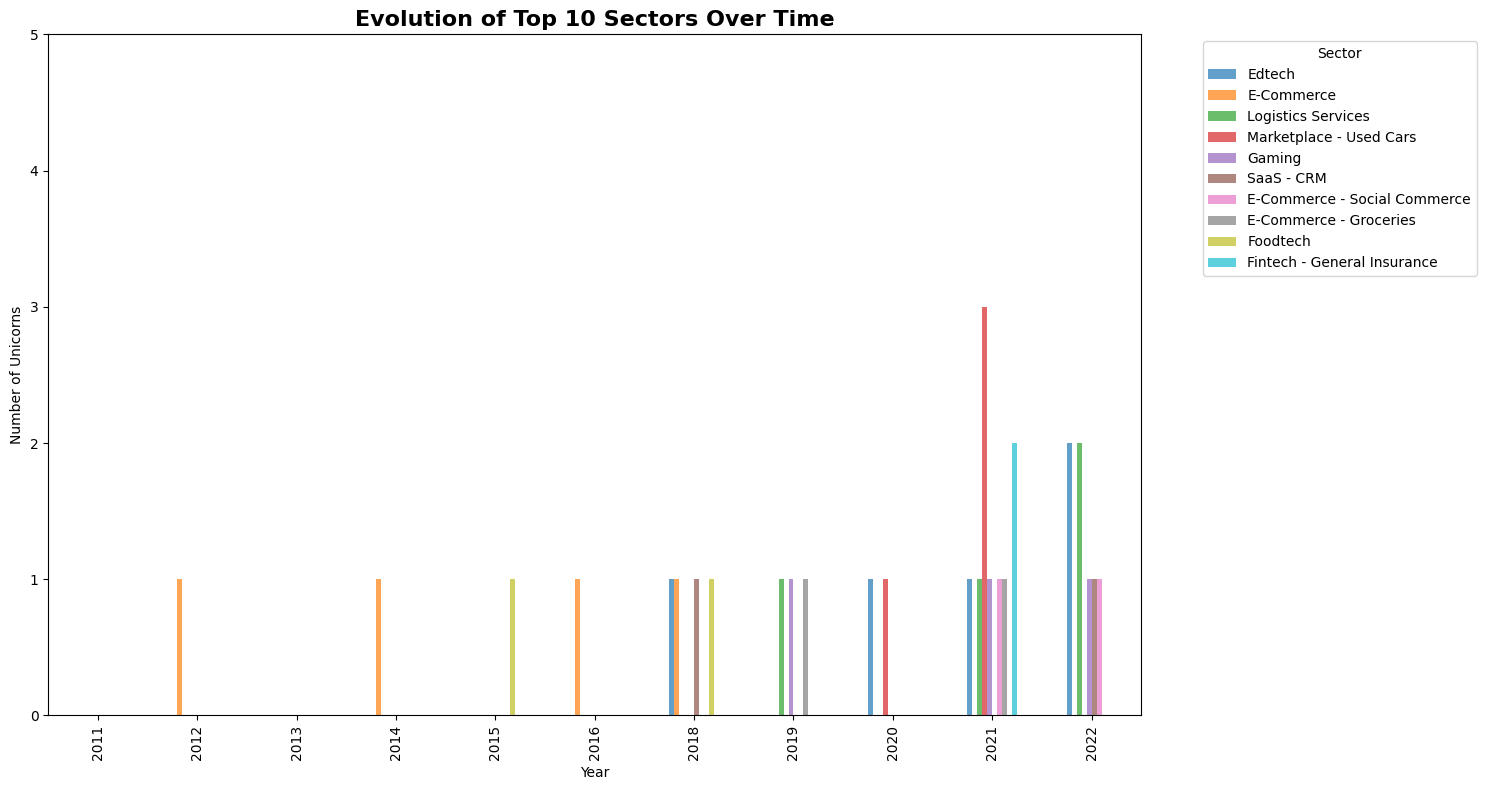

In [ ]:
def display_k_sectors_evolution(df, k):
  sector_year = df.groupby(['Entry_Year', 'Sector']).size().unstack(fill_value=0)

  top_k_sectors_names = df['Sector'].value_counts().head(k).index.tolist()

  sector_year = sector_year[top_k_sectors_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7, ax=plt.gca())

  plt.title(f'Evolution of Top {k} Sectors Over Time', fontweight='bold', fontsize=16)
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.yticks(range(0, sector_year.values.max()+3))
  plt.tight_layout()
  plt.show()

display_k_sectors_evolution(df, 10)

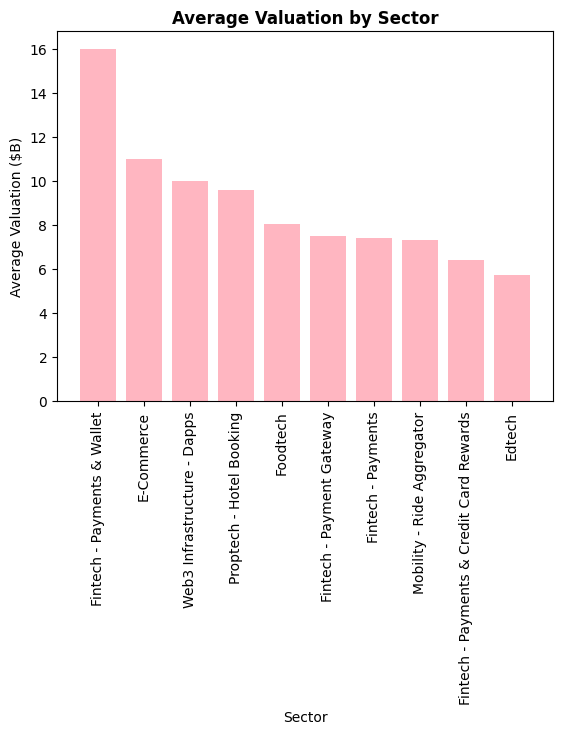

In [ ]:
avg_valuation = df.groupby('Sector')['Valuation ($B)'].mean()
avg_valuation = avg_valuation.sort_values(ascending=False).head(10)

bars = plt.bar(range(len(avg_valuation)), avg_valuation.values, color='lightpink')
plt.title('Average Valuation by Sector', fontweight='bold')
plt.xlabel('Sector')
plt.ylabel('Average Valuation ($B)')
plt.xticks(range(len(avg_valuation)), avg_valuation.index, rotation=90)
plt.show()

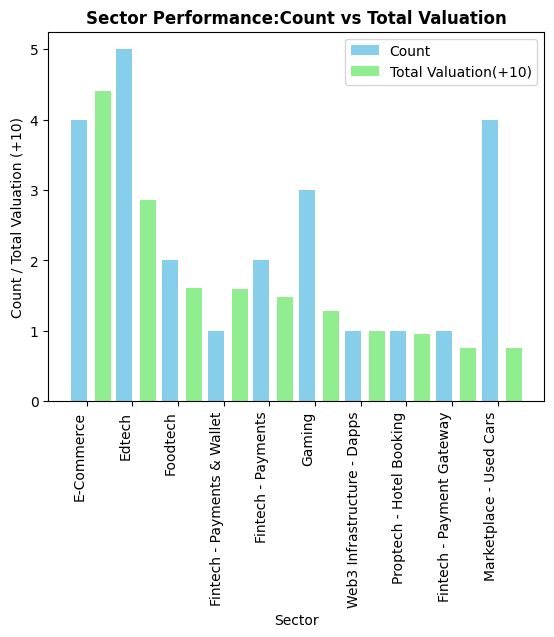

In [ ]:
sector_summary = df.groupby('Sector').agg({'Valuation ($B)':['count','sum']}).round(2)
sector_summary.columns = ['Count','Total Valuation']
sector_summary = sector_summary.sort_values('Total Valuation',ascending=False).head(10)

x=np.arange(len(sector_summary))
width=0.35

plt.bar(x - width/2, sector_summary['Count'],width,label='Count',color='skyblue')
plt.bar(x+width,sector_summary['Total Valuation']/10,width,label='Total Valuation(+10)',color='lightgreen')
plt.xlabel('Sector')
plt.ylabel('Count / Total Valuation (+10)')
plt.title('Sector Performance:Count vs Total Valuation',fontweight='bold')
plt.xticks(x,sector_summary.index,rotation=90, ha='right')
plt.legend()
plt.show()


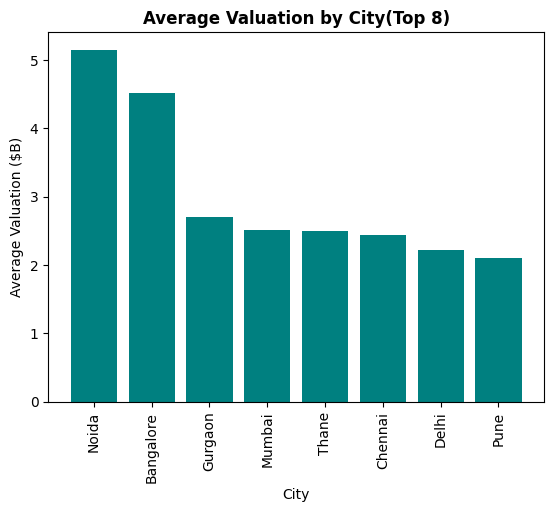

In [ ]:
city_valuation = df.groupby('Primary_City')['Valuation ($B)'].mean()
city_valuation = city_valuation.sort_values(ascending=False).head(8)

bars = plt.bar(city_valuation.index,city_valuation.values, color='teal')
plt.title('Average Valuation by City(Top 8)',fontweight='bold')
plt.xlabel('City')
plt.ylabel('Average Valuation ($B)')
plt.xticks(rotation=90)
plt.show()


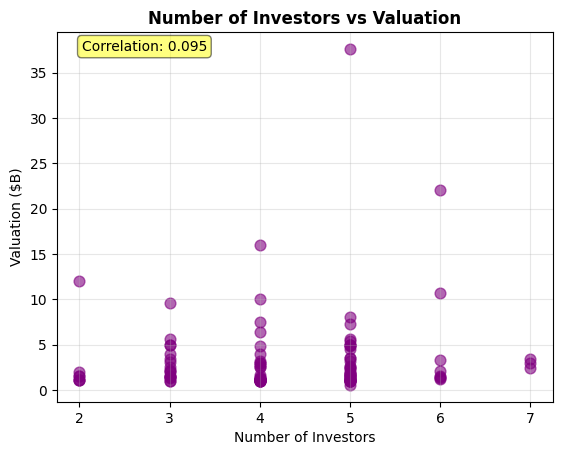

In [ ]:
plt.scatter(df['Investor_Count'], df['Valuation ($B)'], alpha=0.6, s=60, color='purple')
plt.title('Number of Investors vs Valuation', fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Valuation ($B)')
plt.grid(True, alpha=0.3)

correlation = df['Investor_Count'].corr(df['Valuation ($B)'])
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, bbox=dict(boxstyle="round, pad=0.3",facecolor="yellow", alpha=0.5))

plt.show()

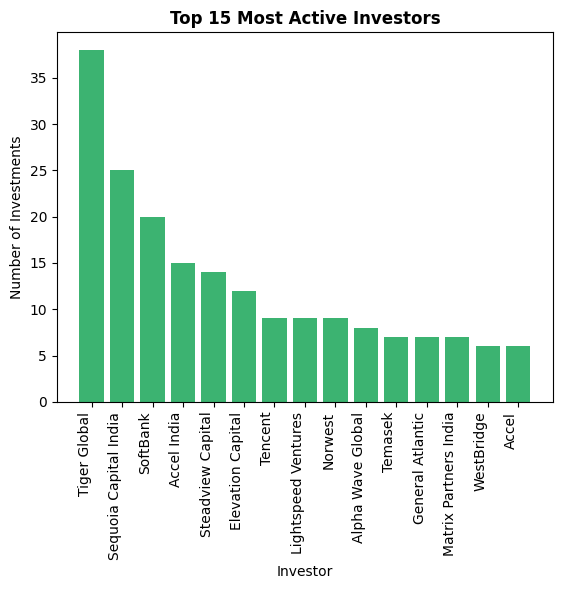

In [ ]:
all_investor =[]
for Investors in df['Select Investors'].dropna():
    all_investor.extend(inv.strip() for inv in Investors.split(','))
investors_counts = pd.Series(all_investor).value_counts().head(15)
bars = plt.bar(range(len(investors_counts)),investors_counts.values,color='mediumseagreen')
plt.title('Top 15 Most Active Investors',fontweight='bold')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(range(len(investors_counts)),investors_counts.index,rotation=90,ha='right')
plt.show()

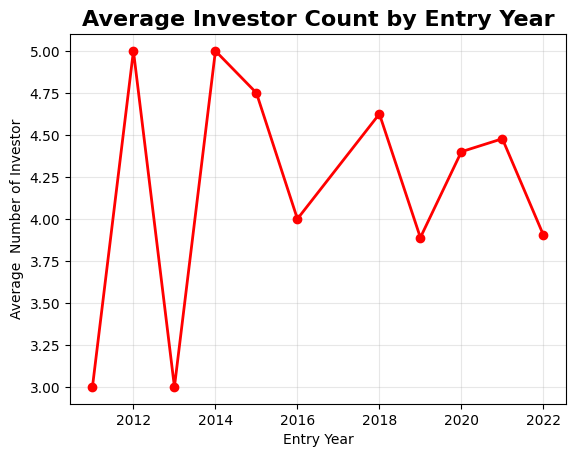

In [ ]:
year_investor=df.groupby('Entry_Year')['Investor_Count'].mean()
plt.plot(year_investor.index,year_investor.values,marker='o',markersize=6,linewidth=2,color='red')
plt.title('Average Investor Count by Entry Year',fontsize=16,fontweight='bold')
plt.xlabel('Entry Year')
plt.ylabel('Average  Number of Investor')
plt.grid(True,alpha=0.3)
plt.show()

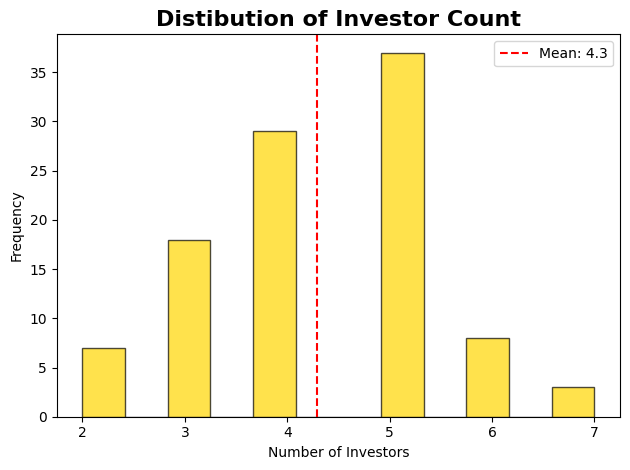

In [ ]:
plt.hist(df['Investor_Count'],bins=12,alpha=0.7,color='gold',edgecolor='black')
plt.title('Distibution of Investor Count',fontsize=16,fontweight='bold')
plt.xlabel('Number of Investors')
plt.ylabel('Frequency')
plt.axvline(df['Investor_Count'].mean(),color='red',linestyle='--',label=f'Mean: {df["Investor_Count"].mean():.1f}')
plt.legend()
plt.tight_layout()
plt.show()